In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 1105 (delta 22), reused 24 (delta 11), pack-reused 1064
Receiving objects: 100% (1105/1105), 51.49 MiB | 32.75 MiB/s, done.
Resolving deltas: 100% (524/524), done.


In [2]:
%cd cytounet 

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import * 

Using TensorFlow backend.


In [4]:
x_train = read_images("examples/BBBC009_v1/images")
y_train = read_images("examples/BBBC009_v1/outlines")

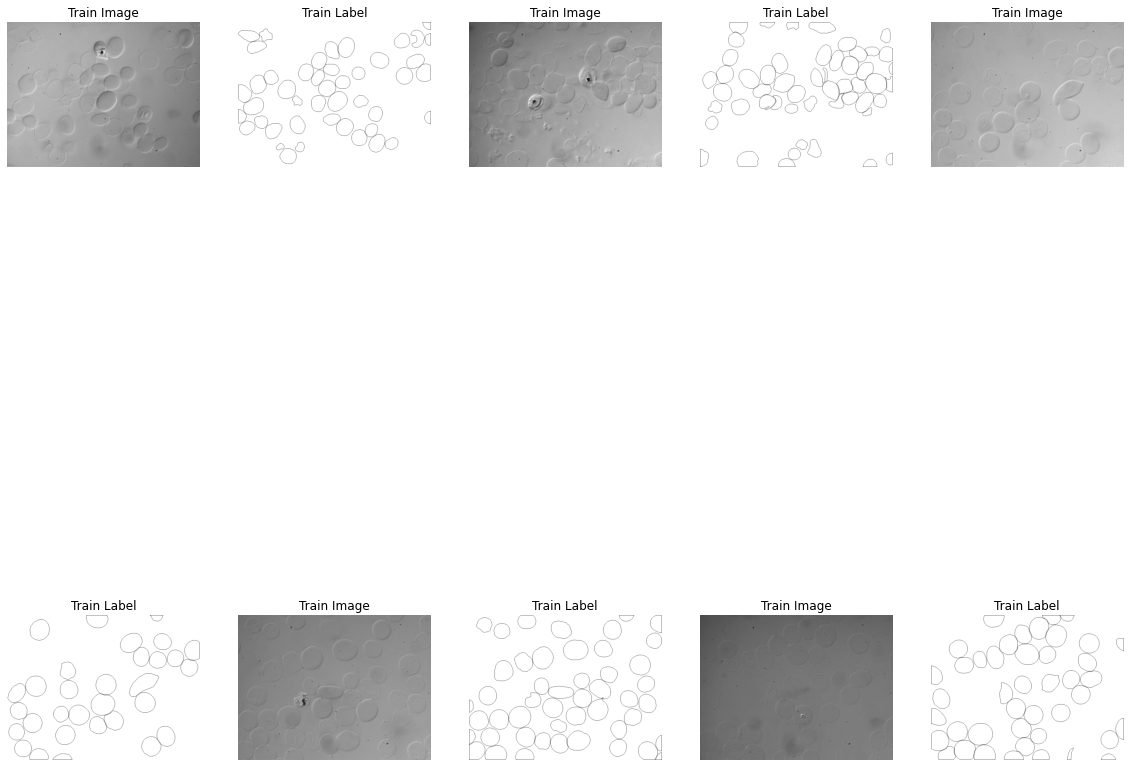

In [5]:
show_images(x_train, y_train, titles=['Train Image', 'Train Label'], number = 6)

In [6]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.05,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest') 

In [7]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [8]:
my_generator = generate_train_data(4,'examples/BBBC009_v1','images','outlines',
                                   data_gen_args,save_to_dir = None, seed= 2,
                              target_size = (256, 256))

In [9]:
model = unet(input_size = (256, 256, 1), optimiser='Adam', learning_rate=1e-4, 
             metrics=[dice_coef], loss=dice_coef_loss, regularizer='l2')

In [10]:
! touch rbc_cells.hdf5

In [11]:
from keras.callbacks import ModelCheckpoint

In [12]:
chkpoint = ModelCheckpoint("rbc_cells.hdf5", monitor="loss", save_best_only=True)

In [13]:
history = train(model, my_generator, epochs = 25, steps_per_epoch= 100,verbose=1,
               callbacks = [chkpoint]) 

Epoch 1/25
Found 5 images belonging to 1 classes.
Found 5 images belonging to 1 classes.
['images/48hr-001-DIC.tif', 'images/48hr-003-DIC.tif', 'images/6hr-001-DIC.tif', 'images/6hr-002-DIC.tif', 'images/6hr-007-DIC.tif']
['outlines/48hr-001-DIC.tif', 'outlines/48hr-003-DIC.tif', 'outlines/6hr-001-DIC.tif', 'outlines/6hr-002-DIC.tif', 'outlines/6hr-007-DIC.tif']
100/100 [==============================] - 14s 139ms/step - loss: 24.6887 - dice_coef: 0.9630
Epoch 2/25
100/100 [==============================] - 5s 53ms/step - loss: 17.2277 - dice_coef: 0.9894
Epoch 3/25
100/100 [==============================] - 5s 50ms/step - loss: 12.2374 - dice_coef: 0.9906
Epoch 4/25
100/100 [==============================] - 6s 57ms/step - loss: 8.8194 - dice_coef: 0.9908
Epoch 5/25
100/100 [==============================] - 5s 50ms/step - loss: 6.4432 - dice_coef: 0.9910
Epoch 6/25
100/100 [==============================] - 5s 54ms/step - loss: 4.7710 - dice_coef: 0.9910
Epoch 7/25
100/100 [=========

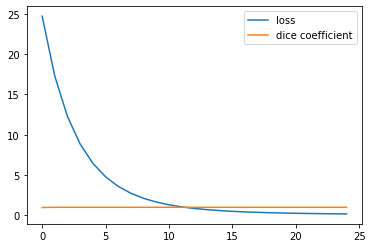

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['dice_coef'])
plt.legend(('loss', 'dice coefficient'))